In [1]:
#IMPORTING REQUIRED PACKAGES
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime,date
from time import strptime
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from collections import Counter
from datetime import timedelta



In [2]:
#READING DATA FILE

my_data=pd.read_csv(r"C:\Users\USER\Desktop\round_1\TrainingData_V1 (1).csv")

In [3]:
#VIEWING FIRST 5 ROWS 
my_data.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1


In [4]:
my_data["delivery_date"].isna().sum()

7436

In [5]:
# FINDING THE ROWS COUNT AND COLUMNS COUNT
print ("Columns: ",my_data.shape[1])
print ("Rows : ", my_data.shape[0])

Columns:  14
Rows :  79945


In [6]:
#CHECNKING INFO LIKE DATA TYPE
my_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  79945 non-null  int64  
 1   order_date     79945 non-null  object 
 2   delivery_date  72509 non-null  object 
 3   item_id        79945 non-null  int64  
 4   item_size      79945 non-null  object 
 5   item_color     79945 non-null  object 
 6   brand_id       79945 non-null  int64  
 7   item_price     79945 non-null  float64
 8   user_id        79945 non-null  int64  
 9   user_title     79945 non-null  object 
 10  user_dob       72956 non-null  object 
 11  user_state     79945 non-null  int64  
 12  user_reg_date  79945 non-null  object 
 13  return         79945 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 8.5+ MB


In [7]:
#CHECKING FOR NULL VALUES
#delivery_date=7436
#user_dob=6989
my_data.isna().sum()


order_item_id       0
order_date          0
delivery_date    7436
item_id             0
item_size           0
item_color          0
brand_id            0
item_price          0
user_id             0
user_title          0
user_dob         6989
user_state          0
user_reg_date       0
return              0
dtype: int64

In [8]:
#function to convert date to specific format and to handle null dates
def datetime_delivery(date_str):
    #if date is null set it to 01-01-1900 to identify it and so that difference will be less than 0
    if date_str!=date_str:
        date_str='01-01-1900'

    return datetime.strptime(date_str, '%d-%m-%Y')

def weekday(x):
    #setting null date value to noday for weekday
    if x!=x:
        x='NoDay'
    else:
        x=datetime.strptime(x, '%d-%m-%Y').strftime('%A')
    return x
def month(x):
    #setting null date value to nomonth for month
    if x!=x:
        x='NoMonth'
    else:
        x=datetime.strptime(x, '%d-%m-%Y').strftime('%B')
    return x


#finding differece of order and delivery date
my_data['Delivery_time']=(my_data.delivery_date.apply(datetime_delivery)-my_data.order_date.apply(datetime_delivery))
my_data['Delivery_time']=my_data.Delivery_time.apply(lambda x: int(str(x).split(" ")[0]) )
#finding weekday
my_data['Weekday']=my_data.delivery_date.apply(weekday)
#finding month
my_data['Month']=my_data.delivery_date.apply(month)

In [9]:
my_data["Weekday"].value_counts()

Sunday       18366
Monday       15227
Saturday     15018
Tuesday      12439
Wednesday    11152
NoDay         7436
Thursday       307
Name: Weekday, dtype: int64

In [10]:
my_data.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Delivery_time,Weekday,Month
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0,5,Monday,June
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1,5,Monday,June
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0,13,Tuesday,July
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0,3,Sunday,June
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1,3,Sunday,June


## imputing delivery date missing values

In [11]:
def imputing_delivery(x,y):
    x0=x[x['return']==1] # subset comprising of return
    x1=x[x['return']==0] # subset comprising of non-return
    x0[y] =x0[y].map( lambda x : x0[y].median() if x <= 0 else x) #replacing returns  delivery time less than 0 with returns median
    x1[y] =x1[y].map( lambda x : x1[y].median() if x <= 0 else x) #replacing non-returns delivery time less than 0 with non-returns median
    return pd.concat([x0,x1])
#Imputing 0 values with median for each class
my_data=imputing_delivery(my_data,'Delivery_time')
my_data['Weekday'][my_data['return']==0].value_counts(),my_data['Weekday'][my_data['return']==1].value_counts()
my_data['Weekday']=my_data['Weekday'].apply(lambda x: x if x!='NoDay' else 'Sunday')
my_data['Month']=my_data['Month'].apply(lambda x: x if x!='NoMonth' else 'August')

<ipython-input-11-cbe7e5c72a7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x0[y] =x0[y].map( lambda x : x0[y].median() if x <= 0 else x) #replacing returns  delivery time less than 0 with returns median
<ipython-input-11-cbe7e5c72a7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[y] =x1[y].map( lambda x : x1[y].median() if x <= 0 else x) #replacing non-returns delivery time less than 0 with non-returns median


In [12]:
my_data["Month"].value_counts()

August       36865
July         22759
September    10741
June          6197
October       1669
December       899
November       812
January          3
Name: Month, dtype: int64

In [13]:
my_data["Weekday"].value_counts()

Sunday       25802
Monday       15227
Saturday     15018
Tuesday      12439
Wednesday    11152
Thursday       307
Name: Weekday, dtype: int64

# Now lets solve the missing values in user_dob

In [14]:
#there are 6989 missing values in the user_dob feature
#now first replace with todays date 

In [15]:
my_data["user_dob"]=my_data["user_dob"].fillna("01-01-2022")
user_dob_1=[datetime.strptime(x, "%d-%m-%Y") for x in my_data["user_dob"]]
my_data["user_dob"]=user_dob_1
my_data["order_date"]=[datetime.strptime(x, "%d-%m-%Y") for x in my_data["order_date"]]
my_data["age"]=(my_data["order_date"]-my_data["user_dob"]).dt.days
my_data["age"]=round(my_data["age"]/365)
def imputing_age(x,y):
    x0=x[x['return']==1] # subset comprising of return
    x1=x[x['return']==0] # subset comprising of non-return
    x0[y] =x0[y].map( lambda x : x0[y].median() if x <= 0 else x) #replacing returns  delivery time less than 0 with returns median
    x1[y] =x1[y].map( lambda x : x1[y].median() if x <= 0 else x) #replacing non-returns delivery time less than 0 with non-returns median
    return pd.concat([x0,x1])
my_data=imputing_age(my_data,'age')    

<ipython-input-15-9d9cef12d517>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x0[y] =x0[y].map( lambda x : x0[y].median() if x <= 0 else x) #replacing returns  delivery time less than 0 with returns median
<ipython-input-15-9d9cef12d517>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[y] =x1[y].map( lambda x : x1[y].median() if x <= 0 else x) #replacing non-returns delivery time less than 0 with non-returns median


### duration register_date and order date

In [16]:
my_data["user_reg_date"]=[datetime.strptime(x, "%d-%m-%Y") for x in my_data["user_reg_date"]]
my_data["order_reg_duration"]=(my_data["order_date"]-my_data["user_reg_date"]).dt.days
def imputing_order_reg_duration(x,y):
    x0=x[x['return']==1] # subset comprising of return
    x1=x[x['return']==0] # subset comprising of non-return
    x0[y] =x0[y].map( lambda x : x0[y].median() if x <= 0 else x) #replacing returns  delivery time less than 0 with returns median
    x1[y] =x1[y].map( lambda x : x1[y].median() if x <= 0 else x) #replacing non-returns delivery time less than 0 with non-returns median
    return pd.concat([x0,x1])

my_data=imputing_order_reg_duration(my_data,'order_reg_duration')

<ipython-input-16-d73bf60a7a54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x0[y] =x0[y].map( lambda x : x0[y].median() if x <= 0 else x) #replacing returns  delivery time less than 0 with returns median
<ipython-input-16-d73bf60a7a54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[y] =x1[y].map( lambda x : x1[y].median() if x <= 0 else x) #replacing non-returns delivery time less than 0 with non-returns median


### feature engineering item_map_catergory

In [17]:
def item_map_category(x):
    x=x.replace("+","")
    if x.isnumeric()==False:  
        if x=='xxxl':
            x=48
        elif x=='xxl':
            x=42
        elif x=='xl':
            x=40
        elif x=='l':
            x=38
        elif x=='m':
            x=29
        elif x=='s':
            x=10
        elif x=='xs':
            x=6
        else: #for non-reported size we choosing mid value
            x=40
    return int(x)
my_data['item_size_updated']=my_data["item_size"].apply(item_map_category)

In [18]:
my_data.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Delivery_time,Weekday,Month,age,order_reg_duration,item_size_updated
1,10,2016-06-22,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,1970-04-22,1001,2015-03-15,1,5.0,Monday,June,46.0,465.0,42
4,43,2016-06-23,26-06-2016,394,40,black,44,90.0,30827,Mrs,2022-01-01,1006,2016-02-09,1,3.0,Sunday,June,50.0,135.0,40
5,45,2016-06-23,26-06-2016,448,42,bordeaux,72,59.9,30828,Mrs,1966-05-13,1008,2016-01-21,1,3.0,Sunday,June,50.0,154.0,42
6,48,2016-06-23,26-06-2016,32,l,white,3,21.9,30828,Mrs,1966-05-13,1008,2016-01-21,1,3.0,Sunday,June,50.0,154.0,38
8,101,2016-06-23,26-06-2016,434,xxl,magenta,28,59.9,5415,Mrs,1959-01-03,1002,2015-02-17,1,3.0,Sunday,June,58.0,492.0,42


In [19]:
my_data["user_title"].value_counts()

Mrs             76267
Mr               3141
Family            339
Company           105
not reported       93
Name: user_title, dtype: int64

In [20]:
my_data=my_data.drop(["delivery_date","order_item_id","item_size","item_color","order_date","user_reg_date","user_dob"],axis=1)

In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
my_data['user_title']= label_encoder.fit_transform(my_data['user_title'])
my_data['Weekday']= label_encoder.fit_transform(my_data['Weekday'])
my_data['Month']= label_encoder.fit_transform(my_data['Month'])

In [23]:
my_data["Weekday"].value_counts()

2    25802
0    15227
1    15018
4    12439
5    11152
3      307
Name: Weekday, dtype: int64

In [24]:
my_data["Month"].value_counts()

0    36865
3    22759
7    10741
4     6197
6     1669
1      899
5      812
2        3
Name: Month, dtype: int64

In [25]:
my_data["user_title"].value_counts()

3    76267
2     3141
1      339
0      105
4       93
Name: user_title, dtype: int64

# Data Preprocessing

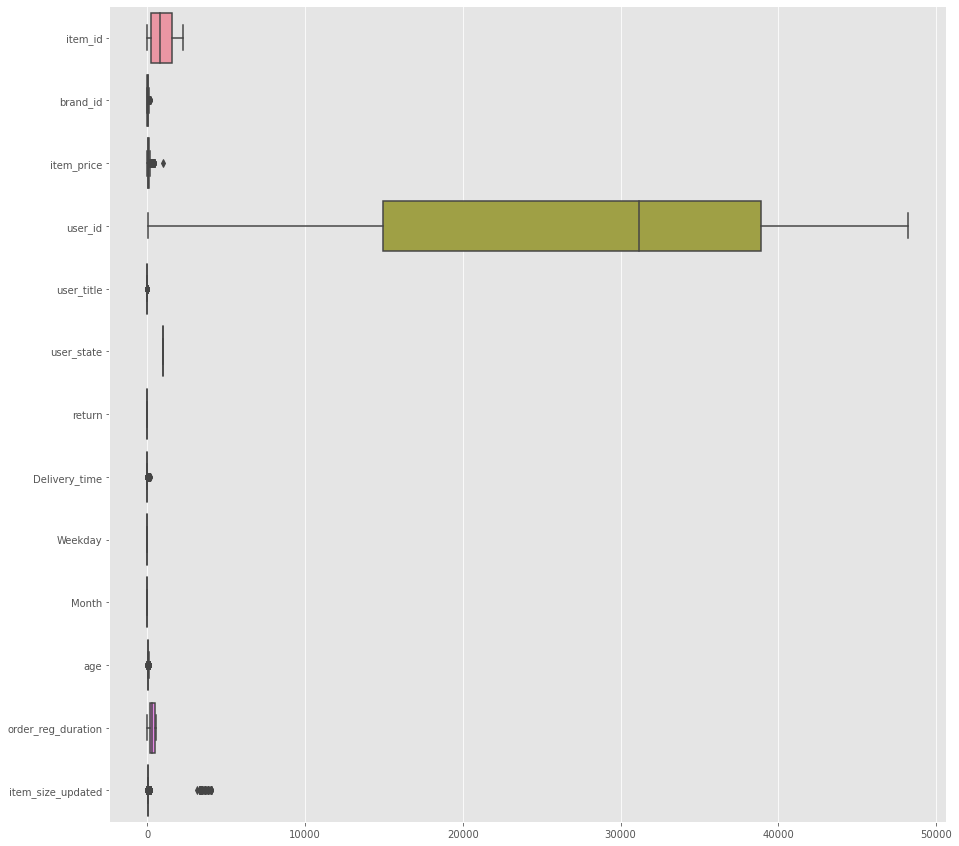

In [26]:
plt.figure(figsize=(15,15)) 
plt.style.use('ggplot')
sns.boxplot(data = my_data,width=.8,orient="h") 
##we are using model that is prone to outliers

In [27]:
my_data["return"].value_counts()    #target data is almost balanced data

0    43283
1    36662
Name: return, dtype: int64

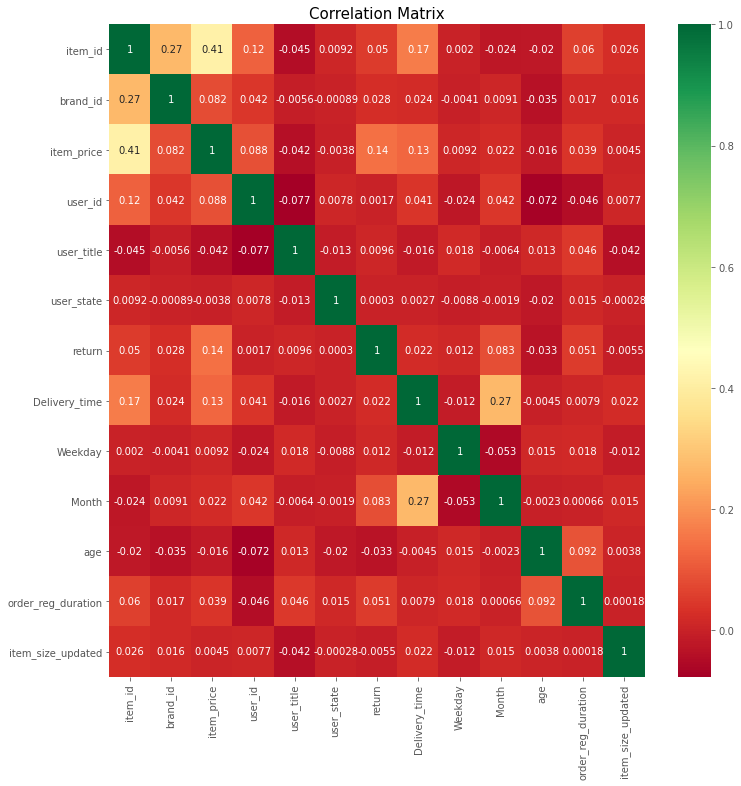

In [28]:
plt.figure(figsize=(12,12))
corr=my_data.corr()
plt.title("Correlation Matrix",fontsize="15")
sns.heatmap(corr,annot=True,cmap ='RdYlGn')

In [29]:
x = my_data.drop(['return'],axis=1) #training features
y = my_data['return'] # target variable



In [30]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.15, random_state=42)

In [31]:
X_train.shape

(67953, 12)

In [32]:
clf =RandomForestClassifier(random_state=1,n_estimators=200,class_weight='balanced',
                    min_samples_leaf=5,
                       min_samples_split=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) #use the model to predict on the validation data

In [33]:
print("Accuracy on test  is:",accuracy_score(y_test,y_pred))

Accuracy on test  is: 0.7360740493662442


In [34]:
#i got around 74% of accuracy on test data.

# CROSS VALIDATION 

In [35]:
scores = cross_val_score(clf, x, y, cv=5)

In [36]:
scores

array([0.73706924, 0.7405091 , 0.74063419, 0.74219776, 0.73375446])

In [37]:
scores.mean()

0.7388329476515104

### CROSS VALIDATION FOR CV=5 IS AROUND 0.74

# PERFORMANCE METRICS

Text(0.5, 15.0, 'Predicted label')

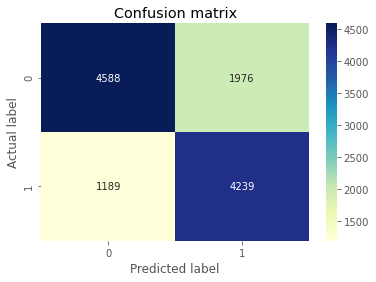

In [38]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      6564
           1       0.68      0.78      0.73      5428

    accuracy                           0.74     11992
   macro avg       0.74      0.74      0.74     11992
weighted avg       0.74      0.74      0.74     11992



In [40]:
from sklearn.metrics import roc_curve
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_proba

array([0.03361631, 0.61568627, 0.47363559, ..., 0.68826697, 0.74864228,
       0.15851992])

In [41]:
from sklearn.metrics import roc_auc_score
legend_data=roc_auc_score(y_test,y_pred_proba)
legend_data=round(legend_data,4)
legend_data

0.8386

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

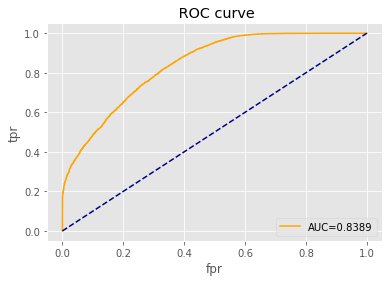

In [43]:
plt.style.use('ggplot')
plt.plot(fpr,tpr, label='clf',color='orange')
plt.plot([0,1],[0,1],'k--',color='navy')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(' ROC curve')
plt.legend(["AUC=0.838"], loc ="lower right") 
plt.show()

# Testing Phase


In [130]:
my_data_testing=pd.read_excel(r"C:\Users\USER\Desktop\round_1\TestingData_For_Candidate (1).xlsx")

In [131]:
my_data_testing.isna().sum()

order_item_id       0
order_date          0
delivery_date    1882
item_id             0
item_size           0
item_color          0
brand_id            0
item_price          0
user_id             0
user_title          0
user_dob         1736
user_state          0
user_reg_date       0
dtype: int64

In [132]:
my_data_testing.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date
0,26,2016-06-23,2016-06-26,92,xl,turquoise,42,69.90,9392,Mrs,1962-04-14,1010,2016-03-24
1,28,2016-06-23,2016-07-02,2,xxl,green,2,19.90,9392,Mrs,1962-04-14,1010,2016-03-24
2,37,2016-06-23,2016-06-26,895,38,white,39,39.95,30826,Mrs,1964-04-27,1001,2015-02-17
3,56,2016-06-23,NaT,5,l,white,5,69.90,30828,Mrs,1966-05-13,1008,2016-01-21
4,65,2016-06-23,NaT,55,40,purple,1,89.90,22948,Mrs,1957-03-11,1001,2015-02-17


In [133]:
my_data_testing["delivery_date"]=[str(x).split(" ")[0] for x in my_data_testing["delivery_date"]]
my_data_testing["delivery_date"]=my_data_testing["delivery_date"].replace(to_replace ="NaT",
                 value ="1900-01-01")
my_data_testing["user_dob"]=[str(x).split(" ")[0] for x in my_data_testing["user_dob"]]
my_data_testing["user_dob"]=my_data_testing["user_dob"].replace(to_replace ="NaT",
                 value ="2022-01-01")
my_data_testing["delivery_date"]=pd.to_datetime(my_data_testing["delivery_date"])
my_data_testing["Delivery_time"]=my_data_testing["delivery_date"]-my_data_testing["order_date"]
my_data_testing["Delivery_time"]=[str(x).split(" ")[0] for x in my_data_testing["Delivery_time"]]
my_data_testing["Delivery_time"]=my_data_testing["Delivery_time"].apply(int)
my_data_testing["Delivery_time"][my_data_testing["Delivery_time"]>0].median()
my_data_testing["Delivery_time"][my_data_testing["Delivery_time"]<0]=3.0

<ipython-input-133-37b82029c54e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data_testing["Delivery_time"][my_data_testing["Delivery_time"]<0]=3.0


In [134]:
weekday_list=[]
for i in my_data_testing["delivery_date"]:
  if str(i)=="1900-01-01 00:00:00":
    weekday_list.append("missing")
  else:
    weekday_list.append(str(i))


my_data_testing["weekday_dummy"]=weekday_list
my_data_testing["weekday_dummy"]=[x.split(" ")[0] for x in my_data_testing["weekday_dummy"]]  

weekday_final=[]
for i in my_data_testing["weekday_dummy"]:
  if i != "missing":
    i=datetime.fromisoformat(i)
    output=i.strftime('%A')
    weekday_final.append(output)
  else:
    weekday_final.append(i)  
my_data_testing["weekday_dummy"]=weekday_final   
my_data_testing["Weekday"]=my_data_testing["weekday_dummy"].replace(to_replace ="missing",
                 value ="Sunday") 

In [135]:
month_list=[]
for i in my_data_testing["delivery_date"]:
  if str(i)=="1900-01-01 00:00:00":
    month_list.append("missing")
  else:
    month_list.append(str(i))


my_data_testing["month_dummy"]=month_list
my_data_testing["month_dummy"]=[x.split(" ")[0] for x in my_data_testing["month_dummy"]]  

month_final=[]
for i in my_data_testing["month_dummy"]:
  if i != "missing":
    i=datetime.fromisoformat(i)
    output=i.strftime('%B')
    month_final.append(output)
  else:
    month_final.append(i)  

my_data_testing["month_dummy"]=month_final   
my_data_testing["Month"]=my_data_testing["month_dummy"].replace(to_replace ="missing",
                 value ="August")

 

In [136]:
my_data_testing.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,Delivery_time,weekday_dummy,Weekday,month_dummy,Month
0,26,2016-06-23,2016-06-26,92,xl,turquoise,42,69.90,9392,Mrs,1962-04-14,1010,2016-03-24,3,Sunday,Sunday,June,June
1,28,2016-06-23,2016-07-02,2,xxl,green,2,19.90,9392,Mrs,1962-04-14,1010,2016-03-24,9,Saturday,Saturday,July,July
2,37,2016-06-23,2016-06-26,895,38,white,39,39.95,30826,Mrs,1964-04-27,1001,2015-02-17,3,Sunday,Sunday,June,June
3,56,2016-06-23,1900-01-01,5,l,white,5,69.90,30828,Mrs,1966-05-13,1008,2016-01-21,3,missing,Sunday,missing,August
4,65,2016-06-23,1900-01-01,55,40,purple,1,89.90,22948,Mrs,1957-03-11,1001,2015-02-17,3,missing,Sunday,missing,August


In [137]:
my_data_testing["order_reg_duration"]=my_data_testing["order_date"]-my_data_testing["user_reg_date"]
my_data_testing["order_reg_duration"]=[str(x).split(" ")[0] for x in my_data_testing["order_reg_duration"]]
my_data_testing["order_reg_duration"]=my_data_testing["order_reg_duration"].apply(float)
my_data_testing["order_reg_duration"]=my_data_testing["order_reg_duration"].abs()
#order_reg_duration

In [110]:
my_data_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20055 entries, 0 to 20054
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_item_id       20055 non-null  int64         
 1   order_date          20055 non-null  datetime64[ns]
 2   delivery_date       20055 non-null  datetime64[ns]
 3   item_id             20055 non-null  int64         
 4   item_size           20055 non-null  object        
 5   item_color          20055 non-null  object        
 6   brand_id            20055 non-null  int64         
 7   item_price          20055 non-null  float64       
 8   user_id             20055 non-null  int64         
 9   user_title          20055 non-null  object        
 10  user_dob            20055 non-null  object        
 11  user_state          20055 non-null  int64         
 12  user_reg_date       20055 non-null  datetime64[ns]
 13  Delivery_time       20055 non-null  int64     

In [138]:
my_data_testing["user_dob"]=pd.to_datetime(my_data_testing["user_dob"])

In [139]:
my_data_testing["age"]=my_data_testing["order_date"]-my_data_testing["user_dob"]

In [140]:
my_data_testing.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,Delivery_time,weekday_dummy,Weekday,month_dummy,Month,order_reg_duration,age
0,26,2016-06-23,2016-06-26,92,xl,turquoise,42,69.90,9392,Mrs,1962-04-14,1010,2016-03-24,3,Sunday,Sunday,June,June,91.0,19794 days
1,28,2016-06-23,2016-07-02,2,xxl,green,2,19.90,9392,Mrs,1962-04-14,1010,2016-03-24,9,Saturday,Saturday,July,July,91.0,19794 days
2,37,2016-06-23,2016-06-26,895,38,white,39,39.95,30826,Mrs,1964-04-27,1001,2015-02-17,3,Sunday,Sunday,June,June,492.0,19050 days
3,56,2016-06-23,1900-01-01,5,l,white,5,69.90,30828,Mrs,1966-05-13,1008,2016-01-21,3,missing,Sunday,missing,August,154.0,18304 days
4,65,2016-06-23,1900-01-01,55,40,purple,1,89.90,22948,Mrs,1957-03-11,1001,2015-02-17,3,missing,Sunday,missing,August,492.0,21654 days


In [141]:
my_data_testing["age"]=[str(x).split(" ")[0] for x in my_data_testing["age"]]

In [142]:
my_data_testing["age"]=my_data_testing["age"].apply(int)
my_data_testing["age"]=my_data_testing["age"]/365

In [143]:
my_data_testing["age"][my_data_testing["age"]>0].median()

51.64383561643836

In [144]:
my_data_testing["age"][my_data_testing["age"]<0]=51.64383561643836
my_data_testing["age"]=round(my_data_testing["age"])

<ipython-input-144-d47ef610f2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data_testing["age"][my_data_testing["age"]<0]=51.64383561643836


In [145]:
my_data_testing.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,Delivery_time,weekday_dummy,Weekday,month_dummy,Month,order_reg_duration,age
0,26,2016-06-23,2016-06-26,92,xl,turquoise,42,69.90,9392,Mrs,1962-04-14,1010,2016-03-24,3,Sunday,Sunday,June,June,91.0,54.0
1,28,2016-06-23,2016-07-02,2,xxl,green,2,19.90,9392,Mrs,1962-04-14,1010,2016-03-24,9,Saturday,Saturday,July,July,91.0,54.0
2,37,2016-06-23,2016-06-26,895,38,white,39,39.95,30826,Mrs,1964-04-27,1001,2015-02-17,3,Sunday,Sunday,June,June,492.0,52.0
3,56,2016-06-23,1900-01-01,5,l,white,5,69.90,30828,Mrs,1966-05-13,1008,2016-01-21,3,missing,Sunday,missing,August,154.0,50.0
4,65,2016-06-23,1900-01-01,55,40,purple,1,89.90,22948,Mrs,1957-03-11,1001,2015-02-17,3,missing,Sunday,missing,August,492.0,59.0


In [146]:
my_data_testing["item_size"]=my_data_testing["item_size"].apply(str)

In [147]:
def item_map_category(x):
    x=x.replace("+","")
    if x.isnumeric()==False:  
        if x=='xxxl':
            x=48
        elif x=='xxl':
            x=42
        elif x=='xl':
            x=40
        elif x=='l':
            x=38
        elif x=='m':
            x=29
        elif x=='s':
            x=10
        elif x=='xs':
            x=6
        else: #for non-reported size we choosing mid value
            x=40
    return int(x)
my_data_testing['item_size_updated']=my_data_testing["item_size"].apply(item_map_category)

In [148]:
my_data_testing.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,...,user_state,user_reg_date,Delivery_time,weekday_dummy,Weekday,month_dummy,Month,order_reg_duration,age,item_size_updated
0,26,2016-06-23,2016-06-26,92,xl,turquoise,42,69.90,9392,Mrs,...,1010,2016-03-24,3,Sunday,Sunday,June,June,91.0,54.0,40
1,28,2016-06-23,2016-07-02,2,xxl,green,2,19.90,9392,Mrs,...,1010,2016-03-24,9,Saturday,Saturday,July,July,91.0,54.0,42
2,37,2016-06-23,2016-06-26,895,38,white,39,39.95,30826,Mrs,...,1001,2015-02-17,3,Sunday,Sunday,June,June,492.0,52.0,38
3,56,2016-06-23,1900-01-01,5,l,white,5,69.90,30828,Mrs,...,1008,2016-01-21,3,missing,Sunday,missing,August,154.0,50.0,38
4,65,2016-06-23,1900-01-01,55,40,purple,1,89.90,22948,Mrs,...,1001,2015-02-17,3,missing,Sunday,missing,August,492.0,59.0,40


In [149]:
my_data_testing=my_data_testing.drop(["delivery_date","item_size","item_color","order_date","user_reg_date","user_dob","weekday_dummy","month_dummy"],axis=1)

In [150]:
my_data_testing.shape

(20055, 13)

In [151]:
my_data_testing.head()

,order_item_id,item_id,brand_id,item_price,user_id,user_title,user_state,Delivery_time,Weekday,Month,order_reg_duration,age,item_size_updated
0,26,92,42,69.90,9392,Mrs,1010,3,Sunday,June,91.0,54.0,40
1,28,2,2,19.90,9392,Mrs,1010,9,Saturday,July,91.0,54.0,42
2,37,895,39,39.95,30826,Mrs,1001,3,Sunday,June,492.0,52.0,38
3,56,5,5,69.90,30828,Mrs,1008,3,Sunday,August,154.0,50.0,38
4,65,55,1,89.90,22948,Mrs,1001,3,Sunday,August,492.0,59.0,40


In [152]:
my_data_testing=my_data_testing[['item_id', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_state', 'Delivery_time', 'Weekday', 'Month', 'age',
       'order_reg_duration', 'item_size_updated',"order_item_id"]]
      

In [153]:
my_data_testing.head()

,item_id,brand_id,item_price,user_id,user_title,user_state,Delivery_time,Weekday,Month,age,order_reg_duration,item_size_updated,order_item_id
0,92,42,69.90,9392,Mrs,1010,3,Sunday,June,54.0,91.0,40,26
1,2,2,19.90,9392,Mrs,1010,9,Saturday,July,54.0,91.0,42,28
2,895,39,39.95,30826,Mrs,1001,3,Sunday,June,52.0,492.0,38,37
3,5,5,69.90,30828,Mrs,1008,3,Sunday,August,50.0,154.0,38,56
4,55,1,89.90,22948,Mrs,1001,3,Sunday,August,59.0,492.0,40,65


In [154]:
my_data_testing["Month"].value_counts()

August       9297
July         5733
September    2616
June         1556
October       384
December      254
November      215
Name: Month, dtype: int64

In [155]:
my_data_testing["user_title"]=my_data_testing["user_title"].map({"Mrs":3,"Mr":2,"Family":1,"Company":0,"not reported":4})
my_data_testing["Month"]=my_data_testing["Month"].map({"August":0,"July":3,"September":7,"June":4,"October":6,"December":1,"November":5,"January":2})
my_data_testing["Weekday"]=my_data_testing["Weekday"].map({"Sunday":2,"Monday":0,"Saturday":1,"Tuesday":4,"Wednesday":5,"Thursday":3})

In [156]:
my_data_testing.head()

,item_id,brand_id,item_price,user_id,user_title,user_state,Delivery_time,Weekday,Month,age,order_reg_duration,item_size_updated,order_item_id
0,92,42,69.90,9392,3,1010,3,2,4,54.0,91.0,40,26
1,2,2,19.90,9392,3,1010,9,1,3,54.0,91.0,42,28
2,895,39,39.95,30826,3,1001,3,2,4,52.0,492.0,38,37
3,5,5,69.90,30828,3,1008,3,2,0,50.0,154.0,38,56
4,55,1,89.90,22948,3,1001,3,2,0,59.0,492.0,40,65


In [72]:
y_pred_test_data = clf.predict(my_data_testing)

In [158]:
item_id=my_data_testing["item_id"]
order_item_id=my_data_testing["order_item_id"]

In [159]:
final_output=pd.DataFrame({"item_id":item_id,"y_pred":y_pred_test_data,"order_item_id":order_item_id})

In [160]:
final_output

,item_id,y_pred,order_item_id
0,92,1,26
1,2,0,28
2,895,1,37
3,5,1,56
4,55,0,65
...,...,...,...
20050,2217,1,99935
20051,1652,0,99943
20052,1611,1,99952
20053,1550,1,99986


In [98]:
my_data_testing["y_pred"]=y_pred_test_data

In [99]:
veri=pd.read_csv(r"C:\Users\USER\Desktop\assignment\Machine-Learning-Pipeline-for-Beginners-main\Machine-Learning-Pipeline-for-Beginners-main\training_set.csv")

In [100]:
veri.shape

(100000, 14)

In [101]:
veri.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaN,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1


In [84]:
new.shape

(3805014, 15)

In [85]:
final_output.shape

(20055, 2)

In [90]:
merged_inner.head()

,order_item_id,order_date,delivery_date,item_id_x,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,item_id_y,y_pred
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,1,0
1,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,1,0
2,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,1,0
3,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,1,0
4,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,1,1


In [161]:
merged_inner = pd.merge(left=veri, right=final_output, on="order_item_id",how="inner")

In [162]:
merged_inner.shape

(20055, 16)

Text(0.5, 15.0, 'Predicted label')

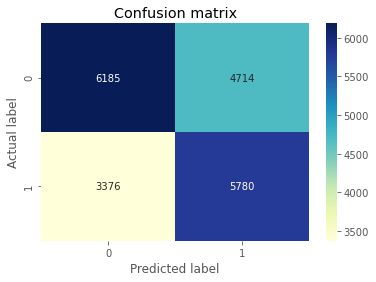

In [163]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(merged_inner["return"], merged_inner["y_pred"])
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
veri.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaN,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1


In [ ]:
veri=pd.read_csv(r"C:\Users\USER\Desktop\assignment\Machine-Learning-Pipeline-for-Beginners-main\Machine-Learning-Pipeline-for-Beginners-main\training_set.csv")

In [164]:
final_output.to_csv('final_output.csv')